In [ ]:
#@title #Importing libraries & uploading csv file
#Importing libraries & uploading csv file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import tensorflow as tf

In [ ]:
from google.colab import files 
uploaded = files.upload()
import io 
data = pd.read_csv(io.BytesIO(uploaded['proj_whole_data.csv'])) 

Saving proj_whole_data.csv to proj_whole_data.csv


In [ ]:
data1 = data
data2 = data

In [ ]:
data = data1

In [ ]:
data.head()

,Unnamed: 0,course_title,difficulty_level,duration,skills,instructors,description,rating,review_date,user_name,reviews
0,0,"Cloud Computing Concepts, Part 1",Beginner Level,Approx. 23 hours to complete,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,"Jun 26, 2017",By Stephanie B,I found the concepts taught in this course int...
1,1,"Cloud Computing Concepts, Part 1",Beginner Level,Approx. 23 hours to complete,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",1.0,"Apr 25, 2018",By Ehsan M,The educational material do not meet the expec...
2,2,"Cloud Computing Concepts, Part 1",Beginner Level,Approx. 23 hours to complete,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,"Jul 11, 2017",By Jason N,The programming assignment is very old style C...
3,3,"Cloud Computing Concepts, Part 1",Beginner Level,Approx. 23 hours to complete,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.0,"Jun 7, 2019",By Craig K,My experience with this course was mostly posi...
4,4,"Cloud Computing Concepts, Part 1",Beginner Level,Approx. 23 hours to complete,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",5.0,"Oct 6, 2016",By Dave P,This instructor is fantastic. He is exception...


In [ ]:
data.columns

Index(['Unnamed: 0', 'course_title', 'difficulty_level', 'duration', 'skills',
       'instructors', 'description', 'rating', 'review_date', 'user_name',
       'reviews'],
      dtype='object')

In [ ]:
data.shape

(43225, 11)

In [ ]:
#@title #Data Preprocessing
#Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43225 entries, 0 to 43224
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        43225 non-null  int64  
 1   course_title      42707 non-null  object 
 2   difficulty_level  31489 non-null  object 
 3   duration          42670 non-null  object 
 4   skills            43225 non-null  object 
 5   instructors       43225 non-null  object 
 6   description       43222 non-null  object 
 7   rating            40813 non-null  float64
 8   review_date       40813 non-null  object 
 9   user_name         40813 non-null  object 
 10  reviews           40288 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.6+ MB


In [ ]:
data.describe()

,Unnamed: 0,rating
count,43225.00000,40813.000000
mean,21612.00000,4.517997
std,12478.12703,1.094949
min,0.00000,1.000000
25%,10806.00000,5.000000
50%,21612.00000,5.000000
75%,32418.00000,5.000000
max,43224.00000,5.000000


In [ ]:
data.dtypes

Unnamed: 0            int64
course_title         object
difficulty_level     object
duration             object
skills               object
instructors          object
description          object
rating              float64
review_date          object
user_name            object
reviews              object
dtype: object

In [ ]:
data['description'][1]

'Cloud computing systems today, whether open-source or used inside companies, are built using a common set of core techniques, algorithms, and design philosophies – all centered around distributed systems. Learn about such fundamental distributed computing "concepts" for cloud computing. Some of these concepts include: clouds, MapReduce, key-value/NoSQL stores, classical distributed algorithms, widely-used distributed algorithms, scalability, trending areas, and much, much more! \n \nKnow how these systems work from the inside out. Get your hands dirty using these concepts with provided homework exercises. In the programming assignments, implement some of these concepts in template code (programs) provided in the C++ programming language. Prior experience with C++ is required.\n \nThe course also features interviews with leading researchers and managers, from both industry and academia. The University of Illinois at Urbana-Champaign is a world leader in research, teaching and public en

In [ ]:
data['description'][25]

'What are the world’s major health challenges?  What contributes to them?  What can we do to improve health outcomes and reduce health disparities?   Whether you are new to Global Health, want to take a refresher course, or want to sample Global Health before undertaking undergraduate or graduate study in the field, The Challenge of Global Health is designed to provide a comprehensive but concise foundation for understanding Global Health problems and solutions. \n\nTaught by Dr. David Boyd, an award-winning professor at Duke University’s Global Health Institute (https://www.youtube.com/watch?v=SB4xBBzNxVQ), the course combines lectures with videos shot around the world and interviews with some of the world’s foremost Global Health experts. Duke University has about 13,000 undergraduate and graduate students and a world-class faculty helping to expand the frontiers of knowledge. The university has a strong commitment to applying knowledge in service to society, both near its North Caro

In [ ]:
data = data.drop(['Unnamed: 0'], axis = 1)  

In [ ]:
data.shape

(43225, 10)

In [ ]:
data = data.dropna(subset=['duration'])
data.shape

(42670, 10)

In [ ]:
#Converting duration string to integer
hours = data.duration.str.extract('(\d+)').astype(int)
data['duration'] = hours
data.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,review_date,user_name,reviews
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,"Jun 26, 2017",By Stephanie B,I found the concepts taught in this course int...
1,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",1.0,"Apr 25, 2018",By Ehsan M,The educational material do not meet the expec...
2,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,"Jul 11, 2017",By Jason N,The programming assignment is very old style C...
3,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.0,"Jun 7, 2019",By Craig K,My experience with this course was mostly posi...
4,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",5.0,"Oct 6, 2016",By Dave P,This instructor is fantastic. He is exception...


In [ ]:
data["difficulty_level"].value_counts()

Beginner Level        20036
Intermediate Level    10088
Advanced Level         1328
Name: difficulty_level, dtype: int64

In [ ]:
#Replacing blank values of difficulty level with Unknown 
data["difficulty_level"].fillna("Unknown", inplace = True)
data["difficulty_level"].value_counts()

Beginner Level        20036
Unknown               11218
Intermediate Level    10088
Advanced Level         1328
Name: difficulty_level, dtype: int64

In [ ]:
diff_lvl_dict = {'Beginner Level':1 , 'Intermediate Level':2, 'Advanced Level':3, 'Unknown':0}
data['numeric_difficulty_lvl'] = data.difficulty_level.map(diff_lvl_dict)
data.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,review_date,user_name,reviews,numeric_difficulty_lvl
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,"Jun 26, 2017",By Stephanie B,I found the concepts taught in this course int...,1
1,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",1.0,"Apr 25, 2018",By Ehsan M,The educational material do not meet the expec...,1
2,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,"Jul 11, 2017",By Jason N,The programming assignment is very old style C...,1
3,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.0,"Jun 7, 2019",By Craig K,My experience with this course was mostly posi...,1
4,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",5.0,"Oct 6, 2016",By Dave P,This instructor is fantastic. He is exception...,1


In [ ]:
data["numeric_difficulty_lvl"].value_counts()

1    20036
0    11218
2    10088
3     1328
Name: numeric_difficulty_lvl, dtype: int64

In [ ]:
#Converting date from string to date format
data['review_date'] = pd.to_datetime(data['review_date'])
data.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,review_date,user_name,reviews,numeric_difficulty_lvl
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,2017-06-26,By Stephanie B,I found the concepts taught in this course int...,1
1,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",1.0,2018-04-25,By Ehsan M,The educational material do not meet the expec...,1
2,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,2017-07-11,By Jason N,The programming assignment is very old style C...,1
3,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.0,2019-06-07,By Craig K,My experience with this course was mostly posi...,1
4,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",5.0,2016-10-06,By Dave P,This instructor is fantastic. He is exception...,1


In [ ]:
data.dtypes

course_title                      object
difficulty_level                  object
duration                           int64
skills                            object
instructors                       object
description                       object
rating                           float64
review_date               datetime64[ns]
user_name                         object
reviews                           object
numeric_difficulty_lvl             int64
dtype: object

In [ ]:
#@title #Data Exploration
#Data Exploration

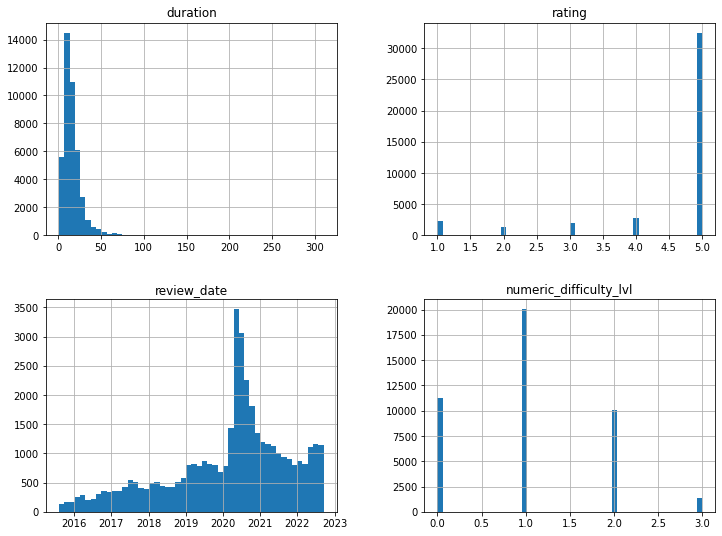

In [ ]:
data.hist(bins=50, figsize=(12,9))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe33a2c1e90>,
      dtype=object)

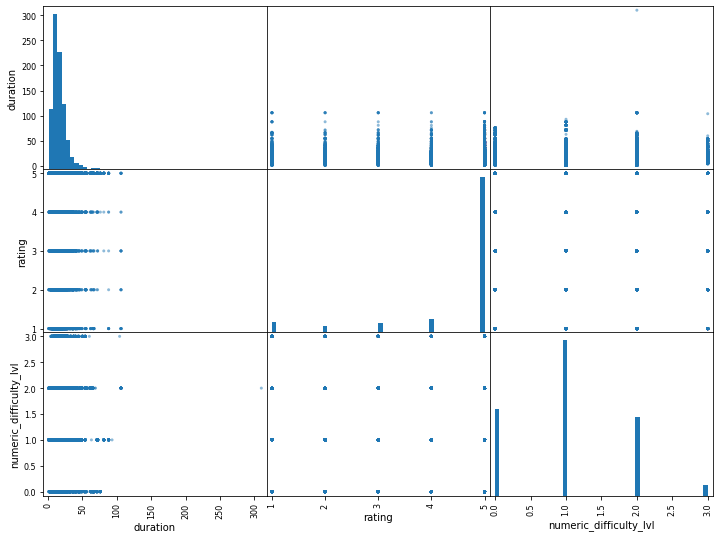

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["duration", "rating", "review_date","numeric_difficulty_lvl"]
scatter_matrix(data[attributes], figsize=(12, 9), hist_kwds= {'bins': 50})

In [ ]:
#Total Unique Courses
course = data.groupby(['course_title']).groups.keys()
len(course)

3788

In [ ]:
a = data.groupby('course_title')['rating'].sum()
top10 = a.nlargest(10)
top10

course_title
Corporate Strategy                                                        246.0
Cryptography                                                              230.0
3-Axis Machining with Autodesk Fusion 360                                 125.0
3.- El Cálculo - Modelo Cúbico                                            125.0
3D CAD Application                                                        125.0
AIDS: Fear and Hope                                                       125.0
API Design and Fundamentals of Google Cloud's Apigee API Platform         125.0
API Security on Google Cloud's Apigee API Platform                        125.0
Accounting Analysis I: The Role of Accounting as an Information System    125.0
Accounting: Principles of Financial Accounting                            125.0
Name: rating, dtype: float64

Text(0, 0.5, 'Number of Ratings')

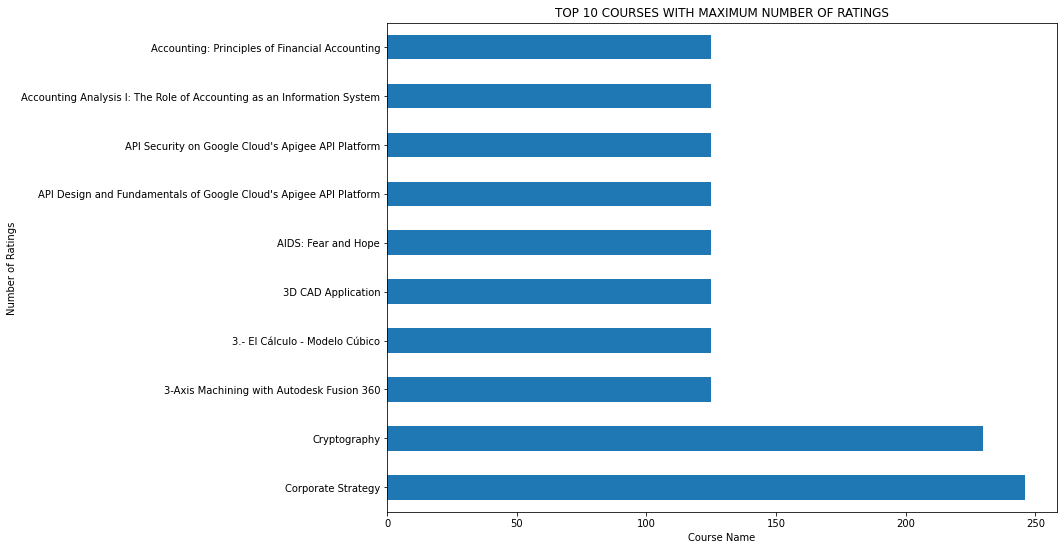

In [ ]:
#Top 10 Courses w.r.t User Ratings
top10.plot(kind="barh", figsize=(12,9))
plt.title('TOP 10 COURSES WITH MAXIMUM NUMBER OF RATINGS')
plt.xlabel('Course Name')
plt.ylabel('Number of Ratings')

Text(0.5, 1.0, 'NUMBER OF COURSES FOR DIFFERENT RATINGS')

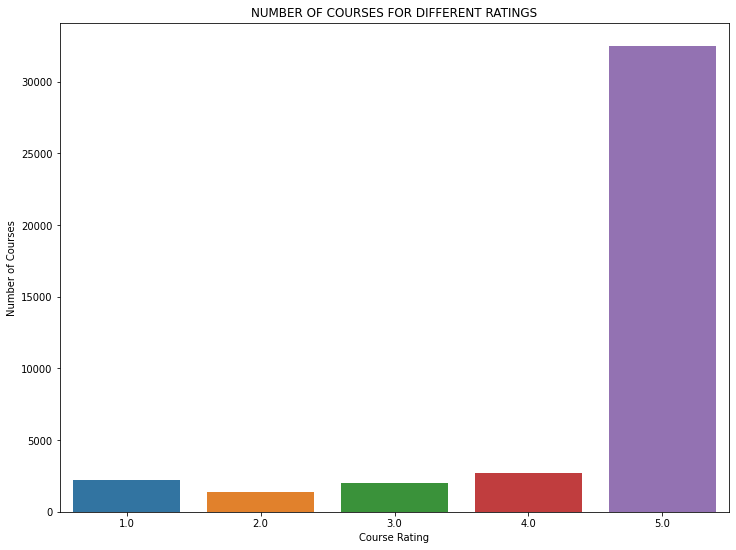

In [ ]:
#User Rating Distribution throughout the data
import seaborn as sns
plt.figure(figsize=(12,9)) 
sns.countplot(x='rating', data=data)
plt.xlabel('Course Rating')
plt.ylabel('Number of Courses')
plt.title('NUMBER OF COURSES FOR DIFFERENT RATINGS')  

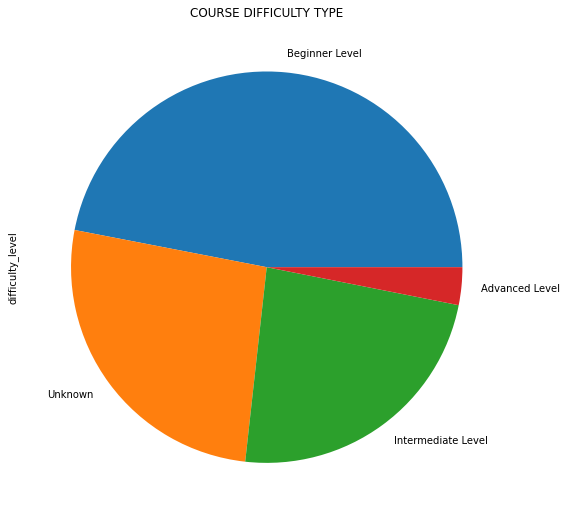

In [ ]:
#Difficulty Level type Distribution throughout the data
ax= data['difficulty_level'].value_counts(ascending=False).plot.pie(figsize=(12, 9))
plt.title('COURSE DIFFICULTY TYPE') 
plt.show()

Text(0.5, 1.0, 'NUMBER OF COURSES FOR DIFFERENT DURATION')

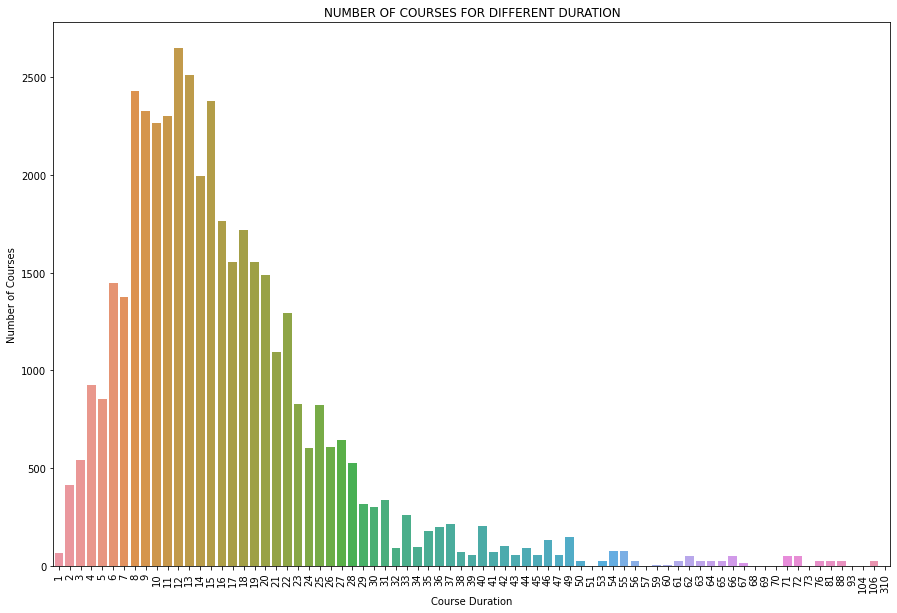

In [ ]:
#Course Duration Distribution throughout the data
#Rating Distribution throughout the data
import seaborn as sns
plt.figure(figsize=(15,10)) 
sns.countplot(x='duration', data=data)
plt.xlabel('Course Duration')
plt.xticks(rotation=90)
plt.ylabel('Number of Courses')
plt.title('NUMBER OF COURSES FOR DIFFERENT DURATION')  

In [ ]:
def label_race (row):
   if row['duration'] <= 10 :
      return 'Short Course Duration'
   if row['duration'] > 10 and row['duration'] <= 35 :
      return 'Medium Course  Duration'
   if row['duration'] >35 and row['duration'] <=70 :
      return 'Long Course Duration'
   if row['duration'] >70  :
      return 'Very Long Course Duration'

In [ ]:
data['duration_label'] = data.apply (lambda row: label_race(row), axis=1)

In [ ]:
data["duration_label"].value_counts()

Medium Course  Duration      27922
Short Course Duration        12646
Long Course Duration          1899
Very Long Course Duration      203
Name: duration_label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NUMBER OF COURSES WITH THEIR DIFFICULTY LEVELS & DURATION')

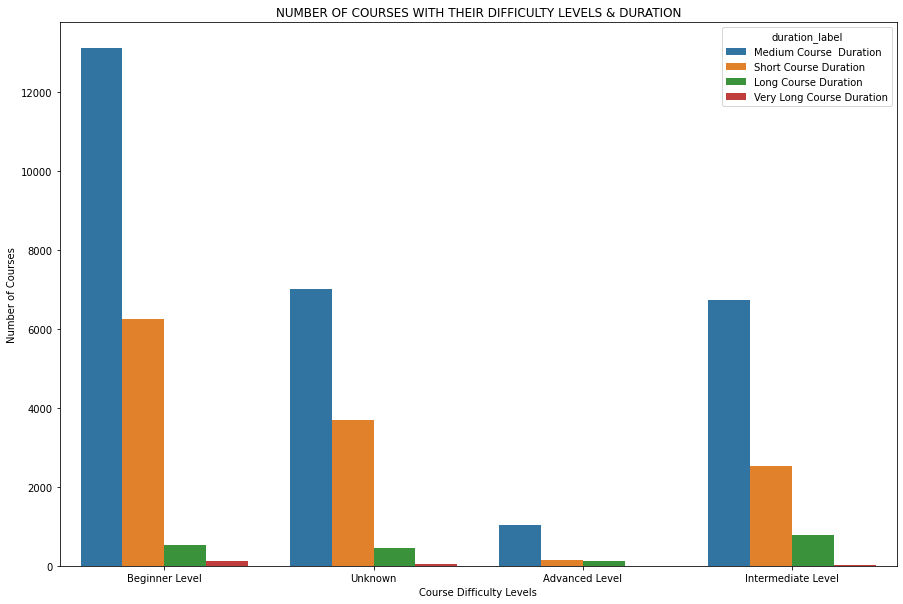

In [ ]:
plt.figure(figsize=(15,10))
g = sns.countplot(data["difficulty_level"] ,hue=data["duration_label"])
plt.xlabel('Course Difficulty Levels')
plt.ylabel('Number of Courses')
plt.title("NUMBER OF COURSES WITH THEIR DIFFICULTY LEVELS & DURATION")



In [ ]:
#Sentiment Analysis based on VADER
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42670 entries, 0 to 43224
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   course_title            42670 non-null  object        
 1   difficulty_level        42670 non-null  object        
 2   duration                42670 non-null  int64         
 3   skills                  42670 non-null  object        
 4   instructors             42670 non-null  object        
 5   description             42670 non-null  object        
 6   rating                  40813 non-null  float64       
 7   review_date             40813 non-null  datetime64[ns]
 8   user_name               40813 non-null  object        
 9   reviews                 40288 non-null  object        
 10  numeric_difficulty_lvl  42670 non-null  int64         
 11  duration_label          42670 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), ob

In [ ]:
data['scores'] = data['reviews'].apply(lambda reviews: sid.polarity_scores(str(reviews)))

In [ ]:
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
data['review polarity'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

data.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,review_date,user_name,reviews,numeric_difficulty_lvl,duration_label,scores,compound,review polarity
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,2017-06-26,By Stephanie B,I found the concepts taught in this course int...,1,Medium Course Duration,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",0.9014,pos
1,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",1.0,2018-04-25,By Ehsan M,The educational material do not meet the expec...,1,Medium Course Duration,"{'neg': 0.0, 'neu': 0.984, 'pos': 0.016, 'comp...",0.0387,pos
2,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",3.0,2017-07-11,By Jason N,The programming assignment is very old style C...,1,Medium Course Duration,"{'neg': 0.057, 'neu': 0.814, 'pos': 0.129, 'co...",0.6258,pos
3,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.0,2019-06-07,By Craig K,My experience with this course was mostly posi...,1,Medium Course Duration,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.9042,pos
4,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",5.0,2016-10-06,By Dave P,This instructor is fantastic. He is exception...,1,Medium Course Duration,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.9377,pos


In [ ]:
data['review polarity'].value_counts()

pos    38326
neg     4344
Name: review polarity, dtype: int64

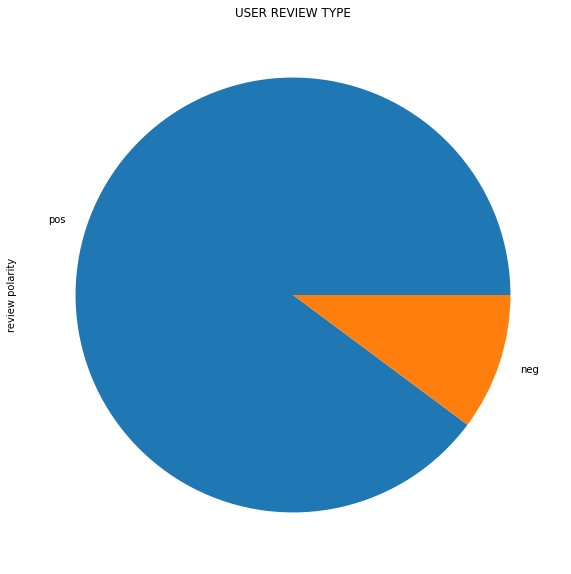

In [ ]:
#Difficulty Level type Distribution throughout the data
ax= data['review polarity'].value_counts(ascending=False).plot.pie(figsize=(15, 10))
plt.title('USER REVIEW TYPE') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NUMBER OF COURSES WITH THEIR REVIEW POLARITY & DURATION LEVELS')

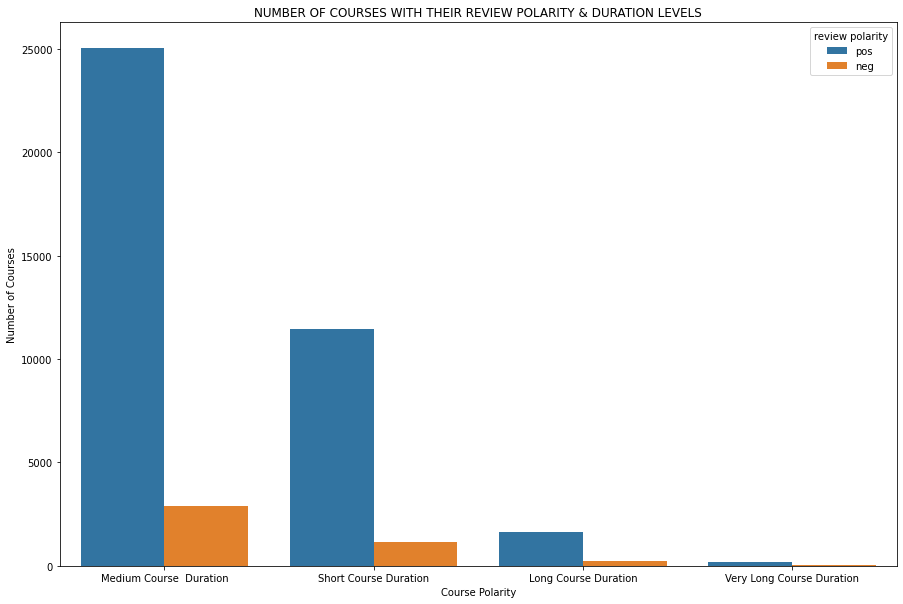

In [ ]:
plt.figure(figsize=(15,10))
g = sns.countplot(data["duration_label"] ,hue=data["review polarity"])
plt.xlabel('Course Polarity')
plt.ylabel('Number of Courses')
plt.title("NUMBER OF COURSES WITH THEIR REVIEW POLARITY & DURATION LEVELS")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NUMBER OF COURSES WITH THEIR REVIEW POLARITY & RATING LEVELS')

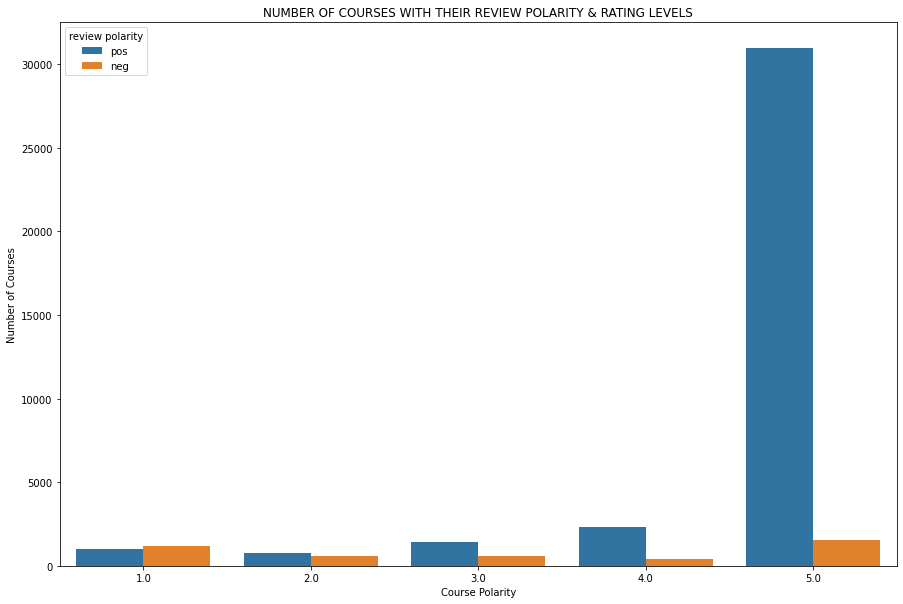

In [ ]:
plt.figure(figsize=(15,10))
g = sns.countplot(data["rating"] ,hue=data["review polarity"])
plt.xlabel('Course Polarity')
plt.ylabel('Number of Courses')
plt.title("NUMBER OF COURSES WITH THEIR REVIEW POLARITY & RATING LEVELS")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NUMBER OF COURSES WITH THEIR REVIEW POLARITY & DIFFICULTY LEVELS')

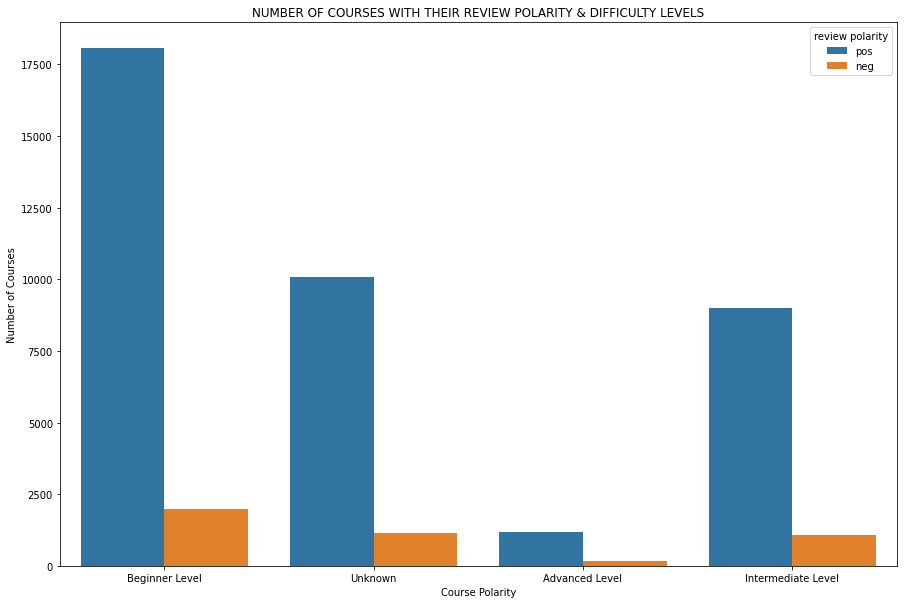

In [ ]:
plt.figure(figsize=(15,10))
g = sns.countplot(data["difficulty_level"] ,hue=data["review polarity"])
plt.xlabel('Course Polarity')
plt.ylabel('Number of Courses')
plt.title("NUMBER OF COURSES WITH THEIR REVIEW POLARITY & DIFFICULTY LEVELS")